#### About Dataset
#### Context
##### "Predict behaviour to retain customers. The aim is to analyse all relevant customer data and develop focused customer retention model." [Telco Customer Churn data set - Kaggle]
#### Content
##### Each row represents a unique customer, each column contains customer’s attributes which are described on the column Metadata.

#### The data set includes information about:

##### Churn Label - Customers who left and loyal customers (Yes/No)
##### Services that each customer has signed up for – Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies
##### Customer account information – how long they’ve been a customer(tenure), contract, payment method, paperless billing, monthly charges, and total charges
##### Demographic information about customers – gender, age range, and if they have partners and dependents

##### Load necessary libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/ile07/OneDrive - Sky/Dev/DS_Exercise/Telco_customer_churn.csv')
df.shape

(7043, 33)

In [3]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


##### Exploratory data Analysis(EDA)

In [4]:
df.columns = df.columns.str.replace(' ', '')


In [5]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [6]:
df.head(5)

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong', 'Latitude', 'Longitude', 'ChurnValue'], axis='columns', inplace=True)
df.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnLabel           object
ChurnScore            int64
CLTV                  int64
ChurnReason          object
dtype: object

In [8]:
df.TotalCharges.values

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 53.85,  70.7 ,  99.65, ..., 103.2 ,  29.6 , 105.65])

In [10]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 23)

In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 23)

In [12]:
df1.drop(['ChurnReason', 'ChurnScore'], axis='columns', inplace=True)


C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\1863567868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['ChurnReason', 'ChurnScore'], axis='columns', inplace=True)


In [13]:
df1.dtypes

Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
TenureMonths          int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
ChurnLabel           object
CLTV                  int64
dtype: object

In [14]:
#pd.to_numeric(df1.TotalCharges)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\3277851254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

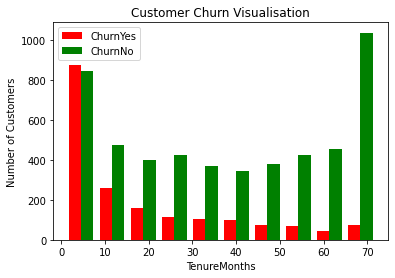

In [16]:
tenure_churn_no = df1[df1.ChurnLabel=='No'].TenureMonths
tenure_churn_yes = df1[df1.ChurnLabel=='Yes'].TenureMonths

plt.xlabel("TenureMonths")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Visualisation")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['ChurnYes', 'ChurnNo'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
ChurnLabel : ['Yes' 'No']


In [19]:
#df1.replace('No phone service', 'No', inplace=True)
#df1.replace('No internet service', 'No', inplace=True)

In [20]:
print_unique_col_values(df1)

Gender : ['Male' 'Female']
SeniorCitizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['Yes' 'No']
MultipleLines : ['No' 'Yes' 'No phone service']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['Yes' 'No' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
ChurnLabel : ['Yes' 'No']


#####  .describe will allow us to see the different categories present in the data set. If we have just 2 then we can use binary encoding and for more than 2 categories we use one-hot encoding 

In [21]:
#df.describe(include='all')

#### Binary Encoding

In [22]:
# Method-1
# Binary - categorical columns (2 unique values)
binary_cols = [
    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'PaperlessBilling', 'ChurnLabel'
]

for col in binary_cols:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\1743845466.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\1743845466.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,

In [23]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Gender: ['Male' 'Female']
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [0 1]
TenureMonths: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['Yes' 'No' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [ 53.85  70.7   99.65 ... 108.35  63.1   78.7 ]
TotalCharges: [ 108.15  151.6

In [24]:
df1['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\4070406045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
C:\Users\ile07\AppData\Local\Temp\ipykernel_7336\4070406045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].re

In [25]:
df1['Gender'].unique()

array([0, 1], dtype=int64)

#### One-Hot Encoding

In [26]:
# method 1
df2 = pd.get_dummies(data=df1, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])
df2.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'CLTV', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
 

In [27]:
df2.sample(4)

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,ChurnLabel,CLTV,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,1,1,0,0,49,1,0,101.55,5070.40,0,5348,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False
2340,0,0,1,1,40,1,1,85.05,3355.65,0,5904,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
3715,1,0,1,0,4,1,0,19.60,93.45,0,4580,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True
217,1,0,0,0,3,1,1,95.10,307.40,1,5861,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False


In [28]:
bool_cols = df2.select_dtypes(include='bool').columns
df2[bool_cols] = df2[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   TenureMonths                             7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   ChurnLabel                               7032 non-null   int64  
 10  CLTV                                     7032 non-nul

In [30]:
corr_matrix = df2.corr(numeric_only=True)
churn_corr = corr_matrix['ChurnLabel'].sort_values(ascending=False)
print(churn_corr)

ChurnLabel                                 1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
Gender                                     0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

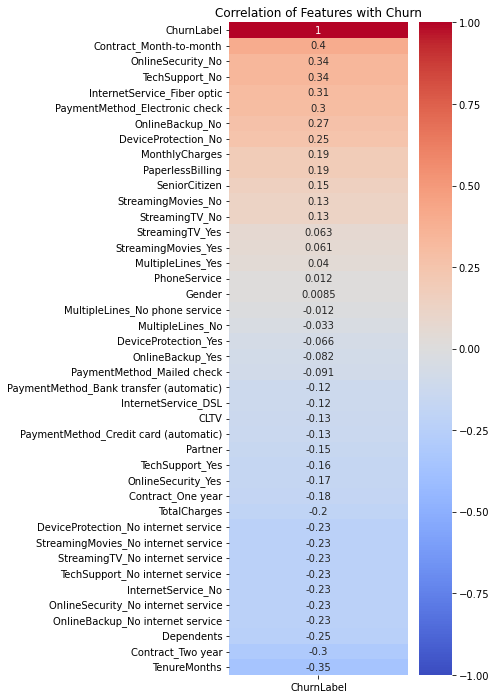

In [31]:
# Compute correlation matrix only for numeric columns
corr_matrix = df2.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['ChurnLabel']].sort_values(by='ChurnLabel', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

#### Negative (lower value → less likely to churn):

###### TenureMonths (-0.35) → Customers who's tenure is longer are less likely to churn.
###### Contract_Two year (-0.30) → Customers who are on long-term contracts churn much less.
###### Contract_One year (-0.18) → Same trend but weaker than two-year contracts.

#### Positive (higher value → more likely to churn):

##### Contract_Month-to-month (+0.40) → Customers with monthly contract are more likely to churn.
##### InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
##### PaymentMethod_Electronic check (+0.30) → Customers paying electronically via check churn more.

#### Look for multicolinearity (VIF)

In [32]:
# We need to collapse redundant columns before running VIF
df2['No_internet_service'] = (
    df2['OnlineSecurity_No internet service'] |
    df2['OnlineBackup_No internet service'] |
    df2['DeviceProtection_No internet service'] |
    df2['TechSupport_No internet service'] |
    df2['StreamingTV_No internet service'] |
    df2['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet service' in col]
df2 = df2.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df2.columns:
    df2['No_phone_service'] = df2['MultipleLines_No phone service'].astype(int)
    df2 = df2.drop(columns=['MultipleLines_No phone service'])

In [33]:
# Prepare X
X = df2.drop(columns=['ChurnLabel'])

#X = df.drop(columns=['ChurnLabel'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [34]:
#%pip install statsmodels


In [35]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

C:\Users\ile07\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                    feature         VIF
21                      DeviceProtection_No         inf
22     DeviceProtection_No internet service         inf
24                           TechSupport_No         inf
25          TechSupport_No internet service         inf
26                          TechSupport_Yes         inf
27                           StreamingTV_No         inf
28          StreamingTV_No internet service         inf
29                          StreamingTV_Yes         inf
30                       StreamingMovies_No         inf
31      StreamingMovies_No internet service         inf
32                      StreamingMovies_Yes         inf
33                  Contract_Month-to-month         inf
34                        Contract_One year         inf
35                        Contract_Two year         inf
36  PaymentMethod_Bank transfer (automatic)         inf
37    PaymentMethod_Credit card (automatic)         inf
38           PaymentMethod_Electronic check     

#### There's multicolinearity between features as seen above

###### To address multicollinearity, options include either dropping features, using regularisation techniques like Lasso or Ridge regression, or using tree-based models.
###### Splits in decision trees are based on feature importance to reduce impurity; redundant features just compete, but will not result in unreliable predictions.

In [36]:
# We have a class imbalance problem
# Given imbalance of (26.5% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df2['ChurnLabel'].value_counts()

ChurnLabel
0    5163
1    1869
Name: count, dtype: int64

##### For churn prediction, recall (and measures derived from it, such as F1) is usually the most important as missing out on False Negative means missing an opportunity to retain the customer.

##### Eastablishing a balance, trade-off between False Positive is necessary by considering the campaign cost:
##### "For low-cost retention programs, prioritise recall to capture all potential churners."
##### "If retention initiatives are costly, consider balancing precision and recall with an F1 score"
##### "To assess churn risk, businesses might utilise ROC-AUC or PR-AUC to evaluate models."



In [37]:
#%pip install lightgbm


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data for training and testing
X = df2.drop(columns=['ChurnLabel'])
y = df2['ChurnLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

#### RANDOM FOREST CLASSIFIER

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))
# recall - 92.5% to stop the possible customers that might churn

              precision    recall  f1-score   support

           0      0.897     0.754     0.820      1033
           1      0.529     0.762     0.624       374

    accuracy                          0.756      1407
   macro avg      0.713     0.758     0.722      1407
weighted avg      0.799     0.756     0.768      1407



In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.496   0.816   0.617   
0.3     0.529   0.762   0.624   
0.35    0.556   0.693   0.617   
0.4     0.579   0.628   0.603   
0.45    0.598   0.556   0.576   
0.5     0.627   0.495   0.553   


#### With help of Random forest we are able to spot 92.5% of actual churners

#### LIGHT GBM CLASSIFIER


In [41]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training time: 0.31 seconds
Prediction time: 0.0060 seconds
              precision    recall  f1-score   support

           0      0.906     0.700     0.790      1033
           1      0.491     0.799     0.608       374

    accuracy                          0.726      1407
   macro avg      0.698     0.750     0.699      1407
weighted avg      0.796     0.726   

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.476   0.818   0.602   
0.3     0.491   0.799   0.608   
0.35    0.509   0.789   0.619   
0.4     0.521   0.762   0.619   
0.45    0.537   0.722   0.616   
0.5     0.535   0.671   0.595   


#### XG BOOST CLASSIFIER


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

Training time: 0.42 seconds
Prediction time: 0.0106 seconds
              precision    recall  f1-score   support

           0      0.907     0.690     0.784      1033
           1      0.485     0.805     0.605       374

    accuracy                          0.721      1407
   macro avg      0.696     0.748     0.694      1407
weighted avg      0.795     0.721     0.736      1407



In [44]:
#%pip install xgboost


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.476   0.832   0.605   
0.3     0.485   0.805   0.605   
0.35    0.500   0.778   0.609   
0.4     0.518   0.751   0.614   
0.45    0.533   0.711   0.609   
0.5     0.549   0.676   0.606   


#### ML model choise XGBoost
##### XGBoosts offers slightly higher recall, than LightGBM which facilitates capturing most churners
##### training time is almost same for both the models.

#### Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [46]:
#%pip install optuna


In [47]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-12-13 22:46:41,032] A new study created in memory with name: no-name-8f51357f-15f2-4a94-9f90-048062f09ce0
[I 2025-12-13 22:46:41,324] Trial 0 finished with value: 0.732620320855615 and parameters: {'n_estimators': 356, 'learning_rate': 0.18808803743256744, 'max_depth': 10, 'subsample': 0.7117192029115919, 'colsample_bytree': 0.6115003571333446, 'min_child_weight': 2, 'gamma': 0.6007395138996391, 'reg_alpha': 0.10201794365388706, 'reg_lambda': 2.1249443660823037}. Best is trial 0 with value: 0.732620320855615.
[I 2025-12-13 22:46:41,590] Trial 1 finished with value: 0.8502673796791443 and parameters: {'n_estimators': 350, 'learning_rate': 0.07413338376427345, 'max_depth': 6, 'subsample': 0.5148655586150503, 'colsample_bytree': 0.7744040312973911, 'min_child_weight': 2, 'gamma': 2.108594732432078, 'reg_alpha': 1.3517769227415872, 'reg_lambda': 2.4806574138444466}. Best is trial 1 with value: 0.8502673796791443.
[I 2025-12-13 22:46:41,966] Trial 2 finished with value: 0.8181818181

[I 2025-12-13 22:46:46,470] Trial 20 finished with value: 0.9037433155080213 and parameters: {'n_estimators': 537, 'learning_rate': 0.09631650841352785, 'max_depth': 4, 'subsample': 0.6416008558347939, 'colsample_bytree': 0.665196093375925, 'min_child_weight': 8, 'gamma': 4.477502236465283, 'reg_alpha': 4.327494530115452, 'reg_lambda': 3.822160922206853}. Best is trial 16 with value: 0.9144385026737968.
[I 2025-12-13 22:46:46,707] Trial 21 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 625, 'learning_rate': 0.11785015204048514, 'max_depth': 3, 'subsample': 0.8723030016627015, 'colsample_bytree': 0.6988610573588003, 'min_child_weight': 4, 'gamma': 4.668879080011768, 'reg_alpha': 4.90275755391273, 'reg_lambda': 4.961396792768493}. Best is trial 16 with value: 0.9144385026737968.
[I 2025-12-13 22:46:46,936] Trial 22 finished with value: 0.8983957219251337 and parameters: {'n_estimators': 613, 'learning_rate': 0.15513483006284418, 'max_depth': 3, 'subsample': 0.78

Best Params: {'n_estimators': 638, 'learning_rate': 0.12869215518687974, 'max_depth': 3, 'subsample': 0.8905960284818736, 'colsample_bytree': 0.8175970656610125, 'min_child_weight': 7, 'gamma': 4.438586915996293, 'reg_alpha': 4.164750739018835, 'reg_lambda': 4.043484575155061}
Best Recall: 0.9144385026737968


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

Training time: 0.21 seconds
Prediction time: 0.0000 seconds
              precision    recall  f1-score   support

           0      0.950     0.589     0.727      1033
           1      0.446     0.914     0.599       374

    accuracy                          0.675      1407
   macro avg      0.698     0.752     0.663      1407
weighted avg      0.816     0.675     0.693      1407



In [49]:
#%pip install mlflow


In [50]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

mlflow.set_tracking_uri("../mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })
     # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)
    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

2025/12/13 22:46:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\ile07\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/12/13 22:47:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\ile07\AppData\Local\Temp\tmpjsrbuwho\model, flavor: xgboost). Fall back to return ['xgboost==2.1.4']. Set logging level to DEBUG to see the full traceback. 
2025/12/13 22:47:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to

              precision    recall  f1-score   support

           0      0.950     0.589     0.727      1033
           1      0.446     0.914     0.599       374

    accuracy                          0.675      1407
   macro avg      0.698     0.752     0.663      1407
weighted avg      0.816     0.675     0.693      1407



#### Trade-offs / Considerations based on the models:

##### LightGBM: significantly better weighted F1. somewhat faster.

##### XGBoost: slightly higher recall for churn (may capture a few more churners).

#### Decision is based on business goals:

##### If we want to capture every possible churner, we might prefer XGBoost (recall 0.91).

##### If we want balanced performance and fewer false positives, LightGBM is superior (greater F1, accuracy).

In [51]:
#%pip install wordcloud


In [52]:
from collections import Counter

# Convert to string & drop missing
comments = df['ChurnReason'].dropna().astype(str)

comment_counts = Counter(comments)

# To inspect top pressing themes
print(comment_counts.most_common(10))


[('Attitude of support person', 192), ('Competitor offered higher download speeds', 189), ('Competitor offered more data', 162), ("Don't know", 154), ('Competitor made better offer', 140), ('Attitude of service provider', 135), ('Competitor had better devices', 130), ('Network reliability', 103), ('Product dissatisfaction', 102), ('Price too high', 98)]


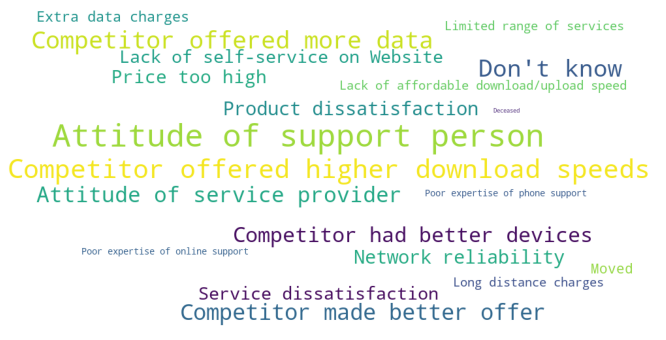

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    collocations=False   
).generate_from_frequencies(comment_counts)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
